# Pets (Dog and Cat) Classifier

### Scraping Data/Images

In [103]:
import os
import requests

from bs4 import BeautifulSoup
from IPython.display import Image

Function to fetch list of image urls for the given query, scraped from google images using `bs4` and `requests`

In [106]:
def get_list_of_img_urls(query):
    url = f"https://www.google.com/search?q={query}+png&tbm=isch"

    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
    }

    res = requests.get(url, headers=headers)

    soup = BeautifulSoup(res.content, "html.parser")

    imgs = soup.findAll('img', class_='rg_i')

    imgs_src = []

    for tag in imgs:
        src = tag.get('src') if tag.get(
            'src') is not None else tag.get('data-src')

        if (src is None):
            continue  # Breaking this iteration

        if src.startswith('data:image/'):
            continue  # Breaking this iteration

        imgs_src.append(src)

    return imgs_src


Function to download images from the list of urls using `requests`

In [107]:
def download_imgs(url_list, dir_name):
    for i, url in enumerate(url_list):
        res = requests.get(url)
        file_path = os.path.join(f"data/{dir_name}/" + f"{dir_name}_{i}.png")
        with open(file_path, "wb") as f:
            f.write(res.content)

#### Fetching and downloading _Dog_ images and saving them in `./data/dog/*`

In [8]:
dog_img_urls = get_list_of_img_urls('dog')

download_imgs(dog_img_urls, dir_name='dog')

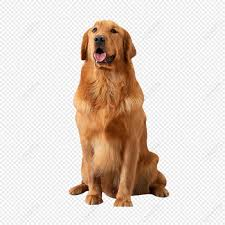

In [17]:
Image('./data/dog/dog_0.png')

#### Fetching and downloading _Cat_ images and saving them in `./data/cat/*`

In [9]:
cat_img_urls = get_list_of_img_urls('cat')

download_imgs(cat_img_urls, dir_name='cat')

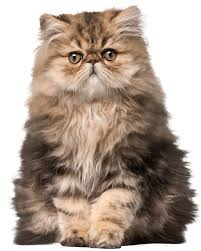

In [16]:
Image('./data/cat/cat_0.png')

### Data Cleaning

After, 30 min of manually cleaning the data 😰 
Removed all grouped images containing more then one pet, removed svg, cartoon images. I don't how to automate this, so this has to be done manually!

### 
> 💀 NOTE: Do not re-run above cells, otherwise data need to be manually cleaned again! So only run it once

### Data Partitioning 

Create list of _1D_ array to represent our images from `dir` of _images_ and combine them in a single list 

In [34]:
import os
import numpy as np

from PIL import Image

dog_imgs = os.listdir('./data/dog/')
cat_imgs = os.listdir('./data/cat/')

for i, item in enumerate(dog_imgs):
    img = Image.open(f"./data/dog/{item}").convert("L").resize((28, 28))
    img_pixels = np.asarray(img).flatten()
    dog_imgs[i] = img_pixels

for i, item in enumerate(cat_imgs):
    img = Image.open(f"./data/cat/{item}").convert("L").resize((28, 28))
    img_pixels = np.asarray(img).flatten()
    cat_imgs[i] = img_pixels

data_list = dog_imgs + cat_imgs


Create list of labels for our images, as we are creating a binary classification modal our labels will either be `dog` or a `cat`

In [35]:
label_list = ["dog"] * len(dog_imgs) + ["cat"] * len(cat_imgs)

Splitting our dataset into _test_ and _train_ at ratio of about 20%

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data_list, label_list, test_size=0.1, random_state=42)

### Creating our classification Modal

In [46]:
from sklearn import svm

svm_classifier_modal = svm.SVC(kernel='linear', C=1.0)

svm_classifier_modal.fit(X_train, y_train)

SVC(kernel='linear')

In [48]:
from sklearn.metrics import accuracy_score, classification_report

pred = svm_classifier_modal.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.75
Classification report:
               precision    recall  f1-score   support

         cat       0.71      0.83      0.77         6
         dog       0.80      0.67      0.73         6

    accuracy                           0.75        12
   macro avg       0.76      0.75      0.75        12
weighted avg       0.76      0.75      0.75        12



The image is of dog
The image


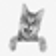

In [72]:
img_array = X_test[9].reshape((28,28))

img = Image.fromarray(img_array).resize((56,56))


print(f"The image is of {pred[9]}")

print("The image")

img

Certainly not correct! right? Need to improve our modal

In [100]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report


k_neighbors_classifier = KNeighborsClassifier(
    n_neighbors=3, metric='manhattan')

k_neighbors_classifier.fit(X_test, y_test)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [101]:

pred = k_neighbors_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, pred)
report = classification_report(y_test, pred)
print("Accuracy:", accuracy)
print("Classification report:\n", report)

Accuracy: 0.6666666666666666
Classification report:
               precision    recall  f1-score   support

         cat       0.60      1.00      0.75         6
         dog       1.00      0.33      0.50         6

    accuracy                           0.67        12
   macro avg       0.80      0.67      0.62        12
weighted avg       0.80      0.67      0.62        12

